<a href="https://colab.research.google.com/github/yanos84/Tutorials/blob/main/crop_health_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: create a random pandas dataframe with ID (incremental) soil ph (between 13 and 0),  Nitrogen (between 0 and 100),  moisture (between 0 and 100), enzyme activity (between 0 and 2),  and Crop Health (Healthy or Stressed)

import pandas as pd
import numpy as np

# Set the number of rows in the DataFrame
num_rows = 10

# Create a DataFrame with the specified columns
df = pd.DataFrame({
    'ID': range(1, num_rows + 1),  # Incremental ID
    'soil_ph': np.random.uniform(0, 13, num_rows),  # Random soil pH values between 0 and 13
    'Nitrogen': np.random.randint(0, 101, num_rows),  # Random Nitrogen values between 0 and 100
    'moisture': np.random.randint(0, 101, num_rows),  # Random moisture values between 0 and 100
    'enzyme_activity': np.random.uniform(0, 2, num_rows),  # Random enzyme activity between 0 and 2
})

# Create Crop Health column with random "Healthy" or "Stressed" values
crop_health_values = np.random.choice(['Healthy', 'Stressed'], size=num_rows)
df['Crop Health'] = crop_health_values

df


,ID,soil_ph,Nitrogen,moisture,enzyme_activity,Crop Health
0,1,6.781396,2,42,1.720506,Healthy
1,2,11.851369,32,60,0.642940,Stressed
2,3,10.373970,66,90,0.921977,Stressed
3,4,11.765090,21,68,1.927113,Stressed
4,5,11.055172,77,69,1.973698,Healthy
5,6,1.907600,80,11,1.025459,Healthy
6,7,7.281328,96,55,1.052322,Stressed
7,8,3.540001,54,69,1.908581,Healthy
8,9,0.558457,99,58,0.132690,Healthy
9,10,7.409021,47,30,0.813917,Healthy


In [2]:
df = df.drop(columns=['ID'])  # Removes the "ID" column

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

"""# Sample synthetic data (biochemical properties of soil/crop)
data = pd.DataFrame({
    "pH": [6.5, 7.0, 6.8, 5.5, 6.2, 7.1, 5.8, 6.7, 7.3, 5.9],
    "Nitrogen": [120, 110, 105, 80, 95, 130, 85, 108, 125, 90],
    "Moisture": [35, 40, 38, 30, 33, 42, 28, 37, 41, 29],
    "Enzyme_Activity": [3.2, 2.8, 3.5, 2.2, 3.0, 3.1, 2.4, 3.3, 3.6, 2.5],
    "Crop_Health": ["Healthy", "Stressed", "Healthy", "Stressed", "Healthy",
                    "Healthy", "Stressed", "Healthy", "Healthy", "Stressed"]
})"""



# Encode target variable (Healthy = 1, Stressed = 0)
label_encoder = LabelEncoder()
df["Crop Health"] = label_encoder.fit_transform(df["Crop Health"])

# Split features and target variable
X = df.drop(columns=["Crop Health"])
y = df["Crop Health"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(16, activation="sigmoid", input_shape=(X_train.shape[1],)),
    Dense(8, activation="sigmoid"),
    Dense(1, activation="sigmoid")  # Binary classification
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
hist = model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_test, y_test))



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5500 - loss: 0.7103 - val_accuracy: 0.5000 - val_loss: 0.7118
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8167 - loss: 0.5654 - val_accuracy: 0.5000 - val_loss: 0.7133
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7333 - loss: 0.6152 - val_accuracy: 0.5000 - val_loss: 0.7128
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7833 - loss: 0.5850 - val_accuracy: 0.5000 - val_loss: 0.7125
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7333 - loss: 0.6049 - val_accuracy: 0.5000 - val_loss: 0.7116
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7000 - loss: 0.6260 - val_accuracy: 0.5000 - val_loss: 0.7106
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7833 - loss: 0.5845 - val_accuracy: 0.5000 - val_loss: 0.7102
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6333 - loss: 0.6664 - val_accuracy: 0.5000 - val_loss: 0.7093
Epoch 9/10


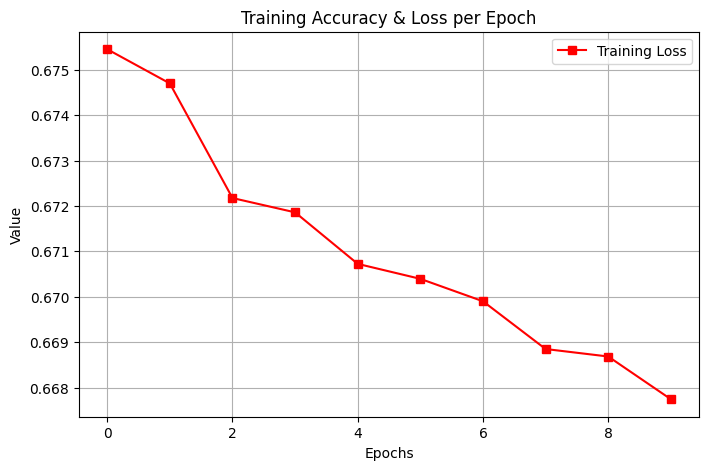

In [8]:
import matplotlib.pyplot as plt

def plot_training_metrics(hist):
    """
    Plots training accuracy and loss in one graph.

    Parameters:
    - history: The history object returned by model.fit()
    """
    plt.figure(figsize=(8, 5))

    # Plot accuracy
    #plt.plot(hist.history['accuracy'], label='Training Accuracy', marker='o', color='blue')

    # Plot loss (on the same y-axis)
    plt.plot(hist.history['loss'], label='Training Loss', marker='s', color='red')

    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.title("Training Accuracy & Loss per Epoch")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# history = model.fit(X_train, y_train, epochs=50, batch_size=4, validation_data=(X_test, y_test))
plot_training_metrics(hist)


In [5]:
# Predict crop health for new samples
new_sample = np.array([[6.8, 100, 36, 3.4]])  # Example biochemical readings
new_sample_scaled = scaler.transform(new_sample)
prediction = model.predict(new_sample_scaled)
predicted_class = "Healthy" if prediction[0][0] > 0.5 else "Stressed"
print(f"Predicted Crop Health: {predicted_class}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Predicted Crop Health: Stressed
